In [1]:
import os
import numpy as np
import torch
from PIL import Image, ImageDraw, ImageFont, ImageColor
import torchvision
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt

from visualize_utils import draw_bounding_boxes

%matplotlib inline

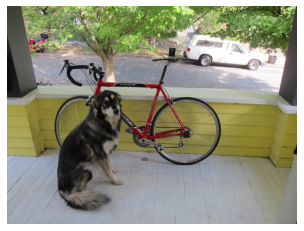

In [2]:
ori_image = Image.open('data/dog.jpg')
plt.axis('off')
plt.imshow(ori_image)

In [6]:
model = torchvision.models.detection.__dict__["ssd300_vgg16"](pretrained=True, score_thresh=0.5)
model = model.eval()
model = model.cuda()

In [20]:
image_tensor = F.pil_to_tensor(ori_image)
image = F.convert_image_dtype(image_tensor)
image = image.cuda()

In [31]:
with torch.inference_mode():
    detection_output = model([image])[0]

In [33]:
boxes = detection_output['boxes'].cpu()
scores = detection_output['scores'].cpu().numpy().tolist()
labels = detection_output['labels'].cpu().numpy().tolist()

coco_class_names = []
for l in open('data/coco.categories').readlines():
    coco_class_names.append(l.split(',')[0])
labels = ["{} | {:.2f}".format(coco_class_names[idx], score) for idx, score in zip(labels, scores)]

In [47]:
out_image = draw_bounding_boxes(image_tensor, boxes, labels, colors=(0, 0, 255), width=2, font='DejaVuSans', font_size=20)

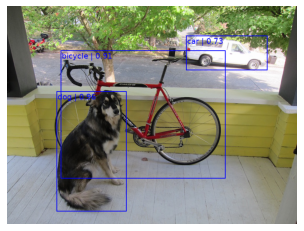

In [48]:
plt.axis('off')
plt.imshow(np.transpose(out_image, (1, 2, 0)))

In [34]:
labels

['dog | 0.96', 'bicycle | 0.91', 'car | 0.73']